In [1]:
# https://www.kaggle.com/rahul1394/amex-coupon-redeem-classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows', 1000)

In [3]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
train = pd.read_csv('train.csv')
train.tail(3)

,id,campaign_id,coupon_id,customer_id,redemption_status
78366,128590,8,754,1004,0
78367,128592,13,134,71,0
78368,128595,13,681,623,0


In [5]:
# list(train['id'].value_counts())

In [6]:
train['redemption_status'].value_counts()

0    77640
1      729
Name: redemption_status, dtype: int64

In [7]:
train['redemption_status'].value_counts()/train['redemption_status'].value_counts().sum()

0    0.990698
1    0.009302
Name: redemption_status, dtype: float64

In [8]:
# redemtioners=np.random.choice(train[train['redemption_status']==0].index, \
#                  77640-729, replace=False)
# redemtioners
# train_Undersampling = train.drop(redemtioners )
# train=train_Undersampling

In [9]:
# redemtioners

In [10]:
train['redemption_status'].value_counts()/train['redemption_status'].value_counts().sum()

0    0.990698
1    0.009302
Name: redemption_status, dtype: float64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


In [12]:
train.coupon_id.nunique()

866

In [13]:
campaign = pd.read_csv('campaign_data.csv')
campaign.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [14]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    28 non-null     int64 
 1   campaign_type  28 non-null     object
 2   start_date     28 non-null     object
 3   end_date       28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [15]:
coupon = pd.read_csv('coupon_item_mapping.csv')
coupon.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [16]:
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   coupon_id  92663 non-null  int64
 1   item_id    92663 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [17]:
transaction = pd.read_csv('customer_transaction_data.csv')
transaction.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [18]:
train.shape

(78369, 5)

In [19]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1324566 non-null  object 
 1   customer_id      1324566 non-null  int64  
 2   item_id          1324566 non-null  int64  
 3   quantity         1324566 non-null  int64  
 4   selling_price    1324566 non-null  float64
 5   other_discount   1324566 non-null  float64
 6   coupon_discount  1324566 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [20]:
item = pd.read_csv('item_data.csv')
item.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [21]:
item.category.unique()

array(['Grocery', 'Miscellaneous', 'Bakery', 'Pharmaceutical',
       'Packaged Meat', 'Seafood', 'Natural Products',
       'Dairy, Juices & Snacks', 'Prepared Food', 'Skin & Hair Care',
       'Meat', 'Travel', 'Flowers & Plants', 'Fuel', 'Salads', 'Alcohol',
       'Garden', 'Restauarant', 'Vegetables (cut)'], dtype=object)

In [22]:
demograph = pd.read_csv('customer_demographics.csv')
demograph.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [23]:
demograph.isnull().sum()/760

customer_id       0.000000
age_range         0.000000
marital_status    0.432895
rented            0.000000
family_size       0.000000
no_of_children    0.707895
income_bracket    0.000000
dtype: float64

In [24]:
demograph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [25]:
campaign['start_date'] = pd.to_datetime(campaign['start_date'])
campaign['end_date'] = pd.to_datetime(campaign['end_date'])
#pd.to_datetime(campaign['end_date'])

In [26]:
campaign['duration'] = abs((campaign['end_date'] -  campaign['start_date']).dt.days)

In [27]:
demograph.income_bracket.unique()

array([ 4,  5,  3,  6,  1,  7,  2,  8,  9, 12, 10, 11], dtype=int64)

In [28]:
demograph['marital_status'] = demograph.groupby(['family_size','age_range'])\
['marital_status'].apply(lambda x: x.fillna(x.mode()[0]))

In [29]:
demograph.marital_status.unique()

array(['Married', 'Single'], dtype=object)

In [30]:
demograph.drop('no_of_children',axis=1,inplace=True)

<AxesSubplot:xlabel='redemption_status', ylabel='count'>

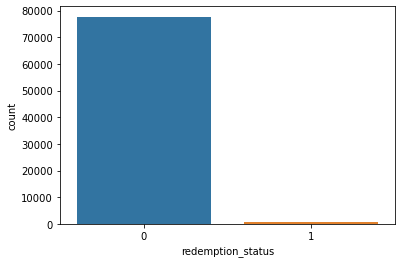

In [31]:
sns.countplot(train.redemption_status)

In [32]:
mtc = pd.merge(train,campaign,on='campaign_id',how='left')
mtc.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,duration
0,1,13,27,1053,0,X,2013-05-19,2013-05-07,12
1,2,13,116,48,0,X,2013-05-19,2013-05-07,12
2,6,9,635,205,0,Y,2013-11-03,2013-12-04,31
3,7,13,644,1050,0,X,2013-05-19,2013-05-07,12
4,9,8,1017,1489,0,X,2013-02-16,2013-05-04,77


In [33]:
mtc.shape

(78369, 9)

In [34]:
mci = pd.merge(coupon,item,on='item_id',how='left')
mci['coupon_id']

0        105
1        107
2        494
3        522
4        518
        ... 
92658     32
92659     32
92660     32
92661     33
92662     31
Name: coupon_id, Length: 92663, dtype: int64

In [35]:
mci.coupon_id.nunique()

1116

In [36]:
mci.shape

(92663, 5)

In [37]:
mci.groupby('coupon_id').count().reset_index()[['coupon_id','item_id']].head()
mci[['coupon_id','category']].sort_values(by='coupon_id')

,coupon_id,category
31428,1,Natural Products
31427,1,Natural Products
29133,1,Natural Products
29036,1,Natural Products
31429,1,Natural Products
...,...,...
30903,1115,Grocery
30902,1115,Grocery
30901,1115,Grocery
65993,1116,Pharmaceutical


In [38]:
mci_group = pd.DataFrame()

In [39]:
mci_group[['coupon_id','item_count']] = \
mci.groupby('coupon_id').count().reset_index()[['coupon_id','item_id']]

In [40]:
mci.groupby('coupon_id').count()

,item_id,brand,brand_type,category
coupon_id,,,,
1,39,39,39,39
2,2,2,2,2
3,17,17,17,17
4,24,24,24,24
5,7,7,7,7
...,...,...,...,...
1112,6,6,6,6
1113,15,15,15,15
1114,3,3,3,3


In [41]:
mci.groupby('coupon_id').max().reset_index().head()

,coupon_id,item_id,brand,brand_type,category
0,1,67376,4700,Established,Natural Products
1,2,12901,2084,Established,Grocery
2,3,59346,1558,Established,Grocery
3,4,61353,544,Established,Grocery
4,5,57118,5357,Established,Pharmaceutical


In [42]:
# mci_group[['brand_type','category']] = \
# mci.groupby('coupon_id').max().reset_index()[['brand_type','category']]
mci_group[['brand_type','category']] = \
mci[['coupon_id','brand_type','category']].groupby('coupon_id').apply(pd.DataFrame.mode)\
.reset_index(drop=True)[['brand_type','category']]

In [43]:
# mci.groupby('coupon_id').max().reset_index()[['brand_type','category']]

In [44]:
# mci[mci['coupon_id']==6]

In [45]:
# mci[['coupon_id','brand_type','category']].groupby('coupon_id').apply(pd.DataFrame.mode).reset_index(drop=True)[['brand_type','category']]

In [46]:
# mci_group.head()

In [47]:
#tgroup = transaction.groupby(['customer_id','item_id','date']).sum().reset_index()
tgroup = transaction.groupby(['customer_id']).sum().reset_index()

In [48]:
tgroup.head()

,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,1,31712801,1227,98513.93,-17030.40,-2116.83
1,2,12698104,474,43100.03,-7051.95,-249.34
2,3,20205585,8163,73050.27,-16013.53,-2179.54
3,4,6180732,280,33973.22,-2927.19,-89.05
4,5,26024517,93353,103615.10,-10817.07,-90.83


In [49]:
tgroup.drop('item_id',axis=1,inplace=True)

In [50]:
tgroup.shape

(1582, 5)

In [51]:
mdtg = pd.merge(tgroup,demograph,on='customer_id',how='outer')
mdtg.head()

,customer_id,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,income_bracket
0,1,1227,98513.93,-17030.40,-2116.83,70+,Married,0.0,2,4.0
1,2,474,43100.03,-7051.95,-249.34,NaN,NaN,NaN,NaN,NaN
2,3,8163,73050.27,-16013.53,-2179.54,NaN,NaN,NaN,NaN,NaN
3,4,280,33973.22,-2927.19,-89.05,NaN,NaN,NaN,NaN,NaN
4,5,93353,103615.10,-10817.07,-90.83,NaN,NaN,NaN,NaN,NaN


In [52]:
mdtg.shape

(1582, 10)

In [53]:
mergeddata = pd.merge(mtc,mdtg,on=['customer_id'],how='left')
mergeddata.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,duration,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,income_bracket
0,1,13,27,1053,0,X,2013-05-19,2013-05-07,12,105551,57120.75,-10282.37,-89.05,46-55,Single,0.0,1,5.0
1,2,13,116,48,0,X,2013-05-19,2013-05-07,12,12143,90185.10,-10664.18,-1237.79,36-45,Married,0.0,2,3.0
2,6,9,635,205,0,Y,2013-11-03,2013-12-04,31,1351,117461.66,-17261.79,-2145.72,46-55,Married,0.0,2,7.0
3,7,13,644,1050,0,X,2013-05-19,2013-05-07,12,306,23291.42,-3947.37,-178.10,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,X,2013-02-16,2013-05-04,77,139063,67797.49,-11534.90,-265.01,46-55,Married,0.0,2,3.0


In [54]:
mergeddata.shape

(78369, 18)

In [55]:
mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 78369 non-null  int64         
 1   campaign_id        78369 non-null  int64         
 2   coupon_id          78369 non-null  int64         
 3   customer_id        78369 non-null  int64         
 4   redemption_status  78369 non-null  int64         
 5   campaign_type      78369 non-null  object        
 6   start_date         78369 non-null  datetime64[ns]
 7   end_date           78369 non-null  datetime64[ns]
 8   duration           78369 non-null  int64         
 9   quantity           78369 non-null  int64         
 10  selling_price      78369 non-null  float64       
 11  other_discount     78369 non-null  float64       
 12  coupon_discount    78369 non-null  float64       
 13  age_range          43661 non-null  object        
 14  marita

In [56]:
mergeddata.isnull().sum()/78369

id                   0.000000
campaign_id          0.000000
coupon_id            0.000000
customer_id          0.000000
redemption_status    0.000000
campaign_type        0.000000
start_date           0.000000
end_date             0.000000
duration             0.000000
quantity             0.000000
selling_price        0.000000
other_discount       0.000000
coupon_discount      0.000000
age_range            0.442879
marital_status       0.442879
rented               0.442879
family_size          0.442879
income_bracket       0.442879
dtype: float64

In [57]:
mergeddata['marital_status'].fillna(mergeddata['marital_status'].mode()[0],inplace=True)

In [58]:
mergeddata['age_range'].fillna(mergeddata['age_range'].mode()[0],inplace=True)

In [59]:
mergeddata['family_size'].fillna(mergeddata['family_size'].mode()[0],inplace=True)

In [60]:
mergeddata['rented'].fillna(mergeddata['rented'].mode()[0],inplace=True)

In [61]:
mergeddata['income_bracket'].fillna(mergeddata['income_bracket'].median(),inplace=True)

In [62]:
mergeddata = pd.merge(mergeddata,mci_group,on=['coupon_id'],how='left')
mergeddata.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,duration,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,income_bracket,item_count,brand_type,category
0,1,13,27,1053,0,X,2013-05-19,2013-05-07,12,105551,57120.75,-10282.37,-89.05,46-55,Single,0.0,1,5.0,125,Established,Grocery
1,2,13,116,48,0,X,2013-05-19,2013-05-07,12,12143,90185.10,-10664.18,-1237.79,36-45,Married,0.0,2,3.0,3,Local,Grocery
2,6,9,635,205,0,Y,2013-11-03,2013-12-04,31,1351,117461.66,-17261.79,-2145.72,46-55,Married,0.0,2,7.0,67,Established,Grocery
3,7,13,644,1050,0,X,2013-05-19,2013-05-07,12,306,23291.42,-3947.37,-178.10,46-55,Married,0.0,2,5.0,4,Established,Pharmaceutical
4,9,8,1017,1489,0,X,2013-02-16,2013-05-04,77,139063,67797.49,-11534.90,-265.01,46-55,Married,0.0,2,3.0,32,Established,Pharmaceutical


In [63]:
mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 78369 non-null  int64         
 1   campaign_id        78369 non-null  int64         
 2   coupon_id          78369 non-null  int64         
 3   customer_id        78369 non-null  int64         
 4   redemption_status  78369 non-null  int64         
 5   campaign_type      78369 non-null  object        
 6   start_date         78369 non-null  datetime64[ns]
 7   end_date           78369 non-null  datetime64[ns]
 8   duration           78369 non-null  int64         
 9   quantity           78369 non-null  int64         
 10  selling_price      78369 non-null  float64       
 11  other_discount     78369 non-null  float64       
 12  coupon_discount    78369 non-null  float64       
 13  age_range          78369 non-null  object        
 14  marita

In [64]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [65]:
lc = LabelEncoder()

In [66]:
mergeddata['age_range'] = lc.fit_transform(mergeddata['age_range'])
mergeddata['family_size'] = lc.fit_transform(mergeddata['family_size'])

In [67]:
mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 78369 non-null  int64         
 1   campaign_id        78369 non-null  int64         
 2   coupon_id          78369 non-null  int64         
 3   customer_id        78369 non-null  int64         
 4   redemption_status  78369 non-null  int64         
 5   campaign_type      78369 non-null  object        
 6   start_date         78369 non-null  datetime64[ns]
 7   end_date           78369 non-null  datetime64[ns]
 8   duration           78369 non-null  int64         
 9   quantity           78369 non-null  int64         
 10  selling_price      78369 non-null  float64       
 11  other_discount     78369 non-null  float64       
 12  coupon_discount    78369 non-null  float64       
 13  age_range          78369 non-null  int32         
 14  marita

In [68]:
item.category.unique()

array(['Grocery', 'Miscellaneous', 'Bakery', 'Pharmaceutical',
       'Packaged Meat', 'Seafood', 'Natural Products',
       'Dairy, Juices & Snacks', 'Prepared Food', 'Skin & Hair Care',
       'Meat', 'Travel', 'Flowers & Plants', 'Fuel', 'Salads', 'Alcohol',
       'Garden', 'Restauarant', 'Vegetables (cut)'], dtype=object)

In [69]:
mergeddata.isna().sum()

id                     0
campaign_id            0
coupon_id              0
customer_id            0
redemption_status      0
campaign_type          0
start_date             0
end_date               0
duration               0
quantity               0
selling_price          0
other_discount         0
coupon_discount        0
age_range              0
marital_status         0
rented                 0
family_size            0
income_bracket         0
item_count             0
brand_type           262
category              97
dtype: int64

In [70]:
cat_list = ['Bakery', 'Packaged Meat', 'Seafood', 'Dairy, Juices & Snacks',
            'Prepared Food','Meat','Salads', 'Alcohol','Vegetables (cut)']

In [71]:
def mapCategory(x):
    if x in cat_list:
        return 'consumable'
    else:
        return 'non-consumable'

In [72]:
mergeddata['category'] = mergeddata['category'].apply(mapCategory)

In [73]:
mergeddata['final_price'] = mergeddata['selling_price'] + abs(mergeddata['other_discount']) + abs(mergeddata['coupon_discount'])
# mergeddata['final_price'] = mergeddata['selling_price']+ mergeddata['other_discount'] + mergeddata['coupon_discount']

In [74]:
# abs(mergeddata['other_discount'])

In [75]:
mergeddata.drop(['selling_price','other_discount','coupon_discount'],axis=1,inplace=True)

In [76]:
mergeddata.income_bracket.unique()

array([ 5.,  3.,  7.,  1.,  4., 10.,  6., 11.,  2.,  8., 12.,  9.])

<AxesSubplot:xlabel='income_bracket', ylabel='count'>

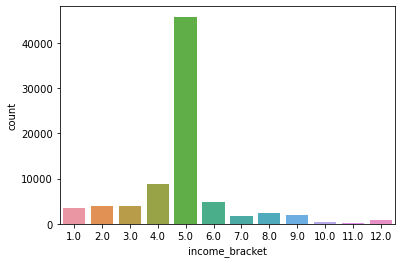

In [77]:
sns.countplot(mergeddata.income_bracket)

In [78]:
def mapIncome(x):
    if (x<4):
        return 'low'
    elif (x>=4 and x<=7):
        return 'middle'
    elif (x>7 and x<=10):
        return 'upper-middle'
    elif (x>10):
        return 'high'

In [79]:
mergeddata['income_bracket'] = mergeddata['income_bracket'].apply(mapIncome)

In [80]:
inc_dict = {'low':1,'middle':2,'upper-middle':3,'high':4}
inc_dict

{'low': 1, 'middle': 2, 'upper-middle': 3, 'high': 4}

In [81]:
mergeddata['income_bracket'] = mergeddata['income_bracket'].map(inc_dict)

<AxesSubplot:xlabel='income_bracket', ylabel='count'>

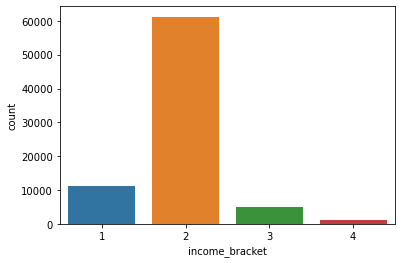

In [82]:
sns.countplot(mergeddata.income_bracket)

In [83]:
mergeddata.drop(['redemption_status','coupon_id','customer_id','id','campaign_id','start_date','end_date'], axis=1).columns

Index(['campaign_type', 'duration', 'quantity', 'age_range', 'marital_status',
       'rented', 'family_size', 'income_bracket', 'item_count', 'brand_type',
       'category', 'final_price'],
      dtype='object')

In [84]:
dummydata = pd.get_dummies(mergeddata.drop(['redemption_status','coupon_id','customer_id','id','campaign_id','start_date','end_date'],axis=1))
dummydata.head()

,duration,quantity,age_range,rented,family_size,income_bracket,item_count,final_price,campaign_type_X,campaign_type_Y,marital_status_Married,marital_status_Single,brand_type_Established,brand_type_Local,category_consumable,category_non-consumable
0,12,105551,3,0.0,0,2,125,67492.17,1,0,0,1,1,0,0,1
1,12,12143,2,0.0,1,1,3,102087.07,1,0,1,0,0,1,0,1
2,31,1351,3,0.0,1,2,67,136869.17,0,1,1,0,1,0,0,1
3,12,306,3,0.0,1,2,4,27416.89,1,0,1,0,1,0,0,1
4,77,139063,3,0.0,1,1,32,79597.40,1,0,1,0,1,0,0,1


In [85]:
from sklearn.preprocessing import RobustScaler, normalize

In [86]:
rc = RobustScaler()
# scaledData

In [87]:
scaledData = pd.DataFrame(rc.fit_transform(dummydata),columns=dummydata.columns)
normalizeddata= pd.DataFrame(normalize(dummydata),columns=dummydata.columns)
scaledData.shape
normalizeddata

,duration,quantity,age_range,rented,family_size,income_bracket,item_count,final_price,campaign_type_X,campaign_type_Y,marital_status_Married,marital_status_Single,brand_type_Established,brand_type_Local,category_consumable,category_non-consumable
0,0.000096,0.842490,0.000024,0.0,0.000000,0.000016,0.000998,0.538711,0.000008,0.000000,0.000000,0.000008,0.000008,0.000000,0.0,0.000008
1,0.000117,0.118115,0.000019,0.0,0.000010,0.000010,0.000029,0.993000,0.000010,0.000000,0.000010,0.000000,0.000000,0.000010,0.0,0.000010
2,0.000226,0.009870,0.000022,0.0,0.000007,0.000015,0.000489,0.999951,0.000000,0.000007,0.000007,0.000000,0.000007,0.000000,0.0,0.000007
3,0.000438,0.011160,0.000109,0.0,0.000036,0.000073,0.000146,0.999938,0.000036,0.000000,0.000036,0.000000,0.000036,0.000000,0.0,0.000036
4,0.000481,0.867886,0.000019,0.0,0.000006,0.000006,0.000200,0.496764,0.000006,0.000000,0.000006,0.000000,0.000006,0.000000,0.0,0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78364,0.001345,0.008594,0.000087,0.0,0.000017,0.000017,0.000070,0.999962,0.000017,0.000000,0.000017,0.000000,0.000000,0.000017,0.0,0.000017
78365,0.004982,0.011613,0.000187,0.0,0.000037,0.000037,0.000262,0.999920,0.000037,0.000000,0.000037,0.000000,0.000037,0.000000,0.0,0.000037
78366,0.000276,0.604444,0.000011,0.0,0.000004,0.000007,0.000297,0.796648,0.000004,0.000000,0.000004,0.000000,0.000004,0.000000,0.0,0.000004
78367,0.000114,0.170529,0.000019,0.0,0.000038,0.000019,0.000067,0.985353,0.000010,0.000000,0.000010,0.000000,0.000000,0.000010,0.0,0.000010


In [88]:
# redcat=mergeddata['redemption_status'].apply(lambda x: 'A' if x==1 else 'O')
# redcat.value_counts()

In [89]:
# pd.concat([scaledData,mergeddata['redemption_status'].apply(lambda x: 'A' if x==1 else 'O')], axis=1).to_csv(r'datatocourseamex2.csv', sep=",", encoding='ISO-8859-8',index=False)

In [90]:
data1=pd.concat([scaledData,mergeddata['redemption_status']], axis=1)
# data2=pd.concat([normalizeddata,mergeddata['redemption_status']], axis=1)
# .apply(lambda x: 'A' if x==1 else 'O')

In [91]:
restdataforanalysis=data1
# restdataforanalysis2=data2

In [92]:
restdataforanalysis.redemption_status.value_counts()

0    77640
1      729
Name: redemption_status, dtype: int64

In [113]:
round(restdataforanalysis.shape[0]*0.66)

51724

In [145]:
restdataforanalysis

redemtioners=np.random.choice(restdataforanalysis.index,round(restdataforanalysis.shape[0]*0.2), replace=False)
redemtioners
restdataforanalysistraning = restdataforanalysis.drop(redemtioners )
restdataforanalysistest=restdataforanalysis[restdataforanalysis.index.isin(redemtioners)]
# restdataforanalysis[restdataforanalysis.index.isin(redemtioners)].to_csv('faustotest.csv' , index=None)
# # restdataforanalysis2
# restdataforanalysis[restdataforanalysis.index.isin(redemtioners)]

In [147]:
restdataforanalysis2
restdataforanalysistest.redemption_status.value_counts()/restdataforanalysistest.redemption_status.count()

0    0.990494
1    0.009506
Name: redemption_status, dtype: float64

In [148]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X = restdataforanalysistraning[restdataforanalysis.columns[:-1]]
y = restdataforanalysistraning[restdataforanalysis.columns[-1]]
X, y = sm.fit_resample(X, y)

In [149]:
# X = restdataforanalysis2[restdataforanalysis2.columns[:-1]]
# y = restdataforanalysis2[restdataforanalysis2.columns[-1]]
# X, y = sm.fit_resample(X, y)

In [150]:
y.value_counts()

0    62115
1    62115
Name: redemption_status, dtype: int64

<AxesSubplot:xlabel='redemption_status', ylabel='count'>

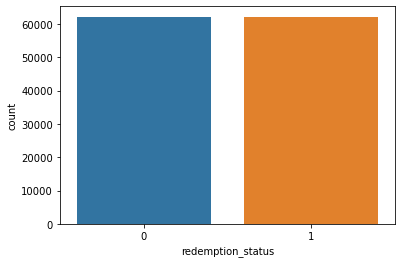

In [151]:
pd.concat([X,y],axis=1)
sns.countplot(pd.concat([X,y],axis=1).redemption_status)

In [152]:
pd.concat([X,y.map(lambda x: 'A' if x==1 else 'O')],axis=1).to_csv(r'datatocourseamex_oversampling.csv', sep=",", encoding='ISO-8859-8',index=False)
# pd.concat([X,y.map(lambda x: 'A' if x==1 else 'O'),y],axis=1).to_csv(r'datatocourseamex_oversamplingnormal.csv', sep=",", encoding='ISO-8859-8',index=False)

In [153]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# pd.concat([X,y],axis=1)
# X = scaledData
# y = mergeddata['redemption_status']


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=1) # 70% training and 30% test

In [154]:
# testfausto=pd.read_csv(r'faustotest.csv')
X_train=X
X_test=restdataforanalysistest[restdataforanalysistest.columns[:-1]]
y_train=y
y_test=restdataforanalysistest[restdataforanalysistest.columns[-1]]

In [155]:
X_train.columns==X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [156]:
# testfausto[testfausto.columns[:-1]]

In [157]:
feature_cols=scaledData.columns
y_test.count()

15674

In [158]:
pd.concat([X,y],axis=1).redemption_status.value_counts()

0    62115
1    62115
Name: redemption_status, dtype: int64

In [159]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### decisiotree

In [160]:
%%time

# Create Decision Tree classifer object
clf = DecisionTreeClassifier( )#class_weight='balanced' max_depth=10,

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Wall time: 1.25 s


Kappa: 0.14428567975187467
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     15525
           1       0.11      0.25      0.16       149

    accuracy                           0.97     15674
   macro avg       0.55      0.61      0.57     15674
weighted avg       0.98      0.97      0.98     15674



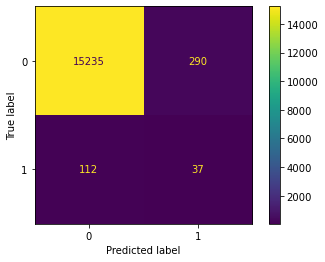

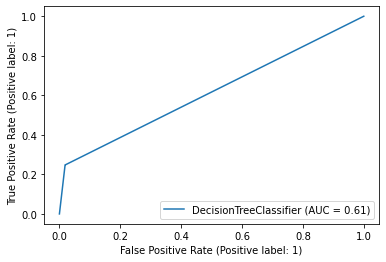

In [161]:
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Kappa:" ,metrics.cohen_kappa_score(y_test, y_pred))

print(classification_report(y_test,y_pred))
metrics.plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()   

In [162]:
X_train.columns

Index(['duration', 'quantity', 'age_range', 'rented', 'family_size',
       'income_bracket', 'item_count', 'final_price', 'campaign_type_X',
       'campaign_type_Y', 'marital_status_Married', 'marital_status_Single',
       'brand_type_Established', 'brand_type_Local', 'category_consumable',
       'category_non-consumable'],
      dtype='object')

## desition tree without brand_type_Local 

In [163]:
%%time
# droppin category_count
X_train_wbtl=X_train.drop('brand_type_Local',axis=1)
X_test_wbtl=X_test.drop('brand_type_Local',axis=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier( )#class_weight='balanced' max_depth=10,

# Train Decision Tree Classifer
clf = clf.fit(X_train_wbtl,y_train)

#Predict the response for test dataset
y_pred_wbtl = clf.predict(X_test_wbtl)

Wall time: 1.29 s


In [164]:
X_train.columns

Index(['duration', 'quantity', 'age_range', 'rented', 'family_size',
       'income_bracket', 'item_count', 'final_price', 'campaign_type_X',
       'campaign_type_Y', 'marital_status_Married', 'marital_status_Single',
       'brand_type_Established', 'brand_type_Local', 'category_consumable',
       'category_non-consumable'],
      dtype='object')

Accuracy: 0.9743524307770831
Kappa: 0.1492783556720657
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     15525
           1       0.12      0.26      0.16       149

    accuracy                           0.97     15674
   macro avg       0.55      0.62      0.57     15674
weighted avg       0.98      0.97      0.98     15674



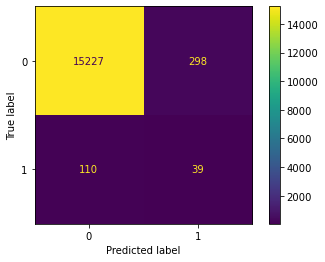

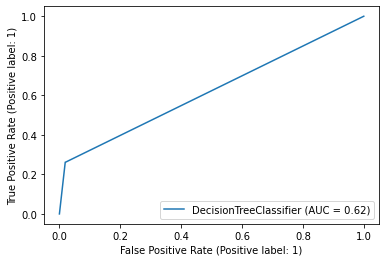

In [165]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Kappa:" ,metrics.cohen_kappa_score(y_test, y_pred_wbtl))
# print("Kappa:" ,metrics.cohen_kappa_score(y_test, y_pred))
print(classification_report(y_test,y_pred_wbtl))
metrics.plot_confusion_matrix(clf, X_test_wbtl, y_test)  
plt.show() 
metrics.plot_roc_curve(clf, X_test_wbtl, y_test)  
plt.show()   

### desition tree deph 10

In [166]:
%%time

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_leaf_nodes=150 )#class_weight='balanced' max_depth=10,random_state=42,

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Wall time: 1.11 s


Accuracy: 0.8920505295393646
Kappa: 0.06408168027362271
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     15525
           1       0.04      0.50      0.08       149

    accuracy                           0.89     15674
   macro avg       0.52      0.70      0.51     15674
weighted avg       0.99      0.89      0.93     15674



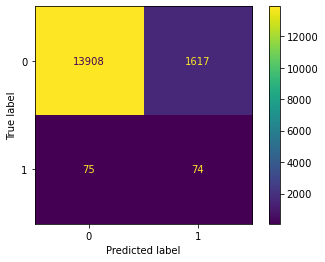

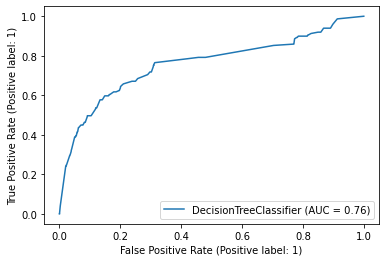

In [167]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Kappa:" ,metrics.cohen_kappa_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
metrics.plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()   

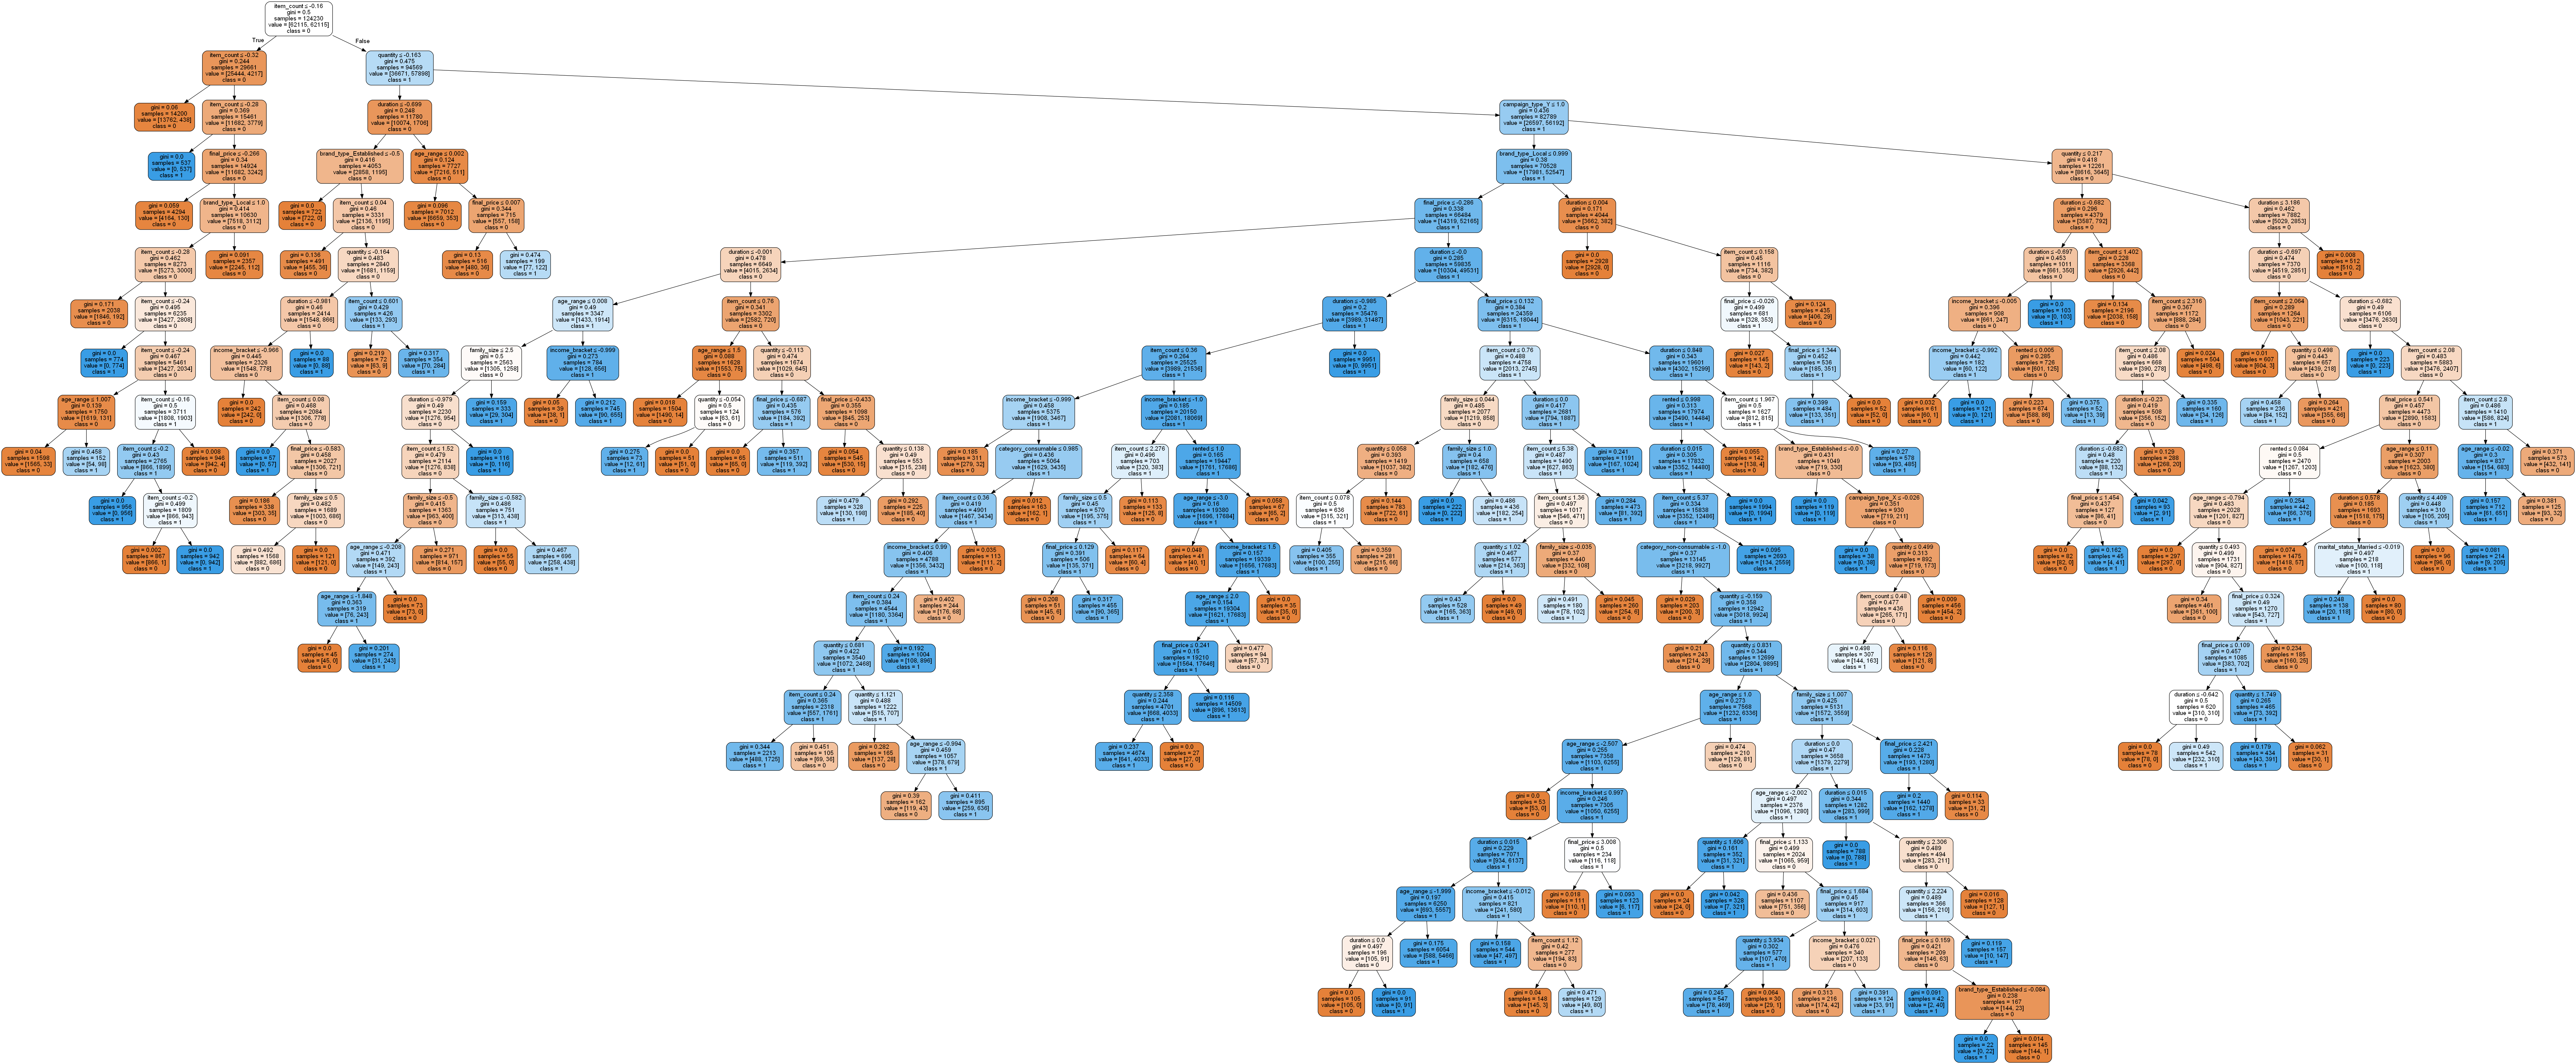

In [180]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from six import StringIO

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('treeamex.png')
Image(graph.create_png())

In [179]:
# !pip install pydotplus

  Using cached pydotplus-2.0.2-py3-none-any.whl


### Logistic Regression

In [169]:
%%time
# logreg = LogisticRegression()
clf2 =LogisticRegression()

# LogisticRegression
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test)

Wall time: 2.63 s


Accuracy: 0.6936965675641189
Kappa: 0.02351215280485719
              precision    recall  f1-score   support

           0       1.00      0.69      0.82     15525
           1       0.02      0.70      0.04       149

    accuracy                           0.69     15674
   macro avg       0.51      0.70      0.43     15674
weighted avg       0.99      0.69      0.81     15674



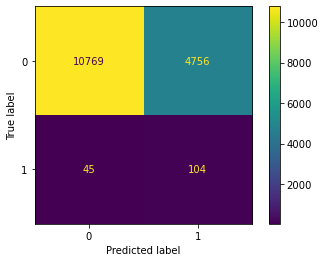

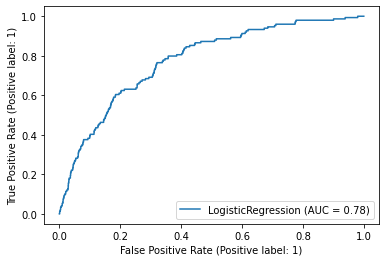

In [170]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Kappa:" ,metrics.cohen_kappa_score(y_test, y_pred2))
print(classification_report(y_test,y_pred2))
metrics.plot_confusion_matrix(clf2, X_test, y_test)  
plt.show() 
metrics.plot_roc_curve(clf2, X_test, y_test)  
plt.show()   

## XGBOOST

In [171]:
%%time
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train,y_train)

[23:13:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 11.6 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Aaccuracy: 0.9703330356003573
ROC AUC: 0.8437160241653967
Kappa: 0.14728810049454044
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     15525
           1       0.11      0.30      0.16       149

    accuracy                           0.97     15674
   macro avg       0.55      0.64      0.57     15674
weighted avg       0.98      0.97      0.98     15674

[23:14:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


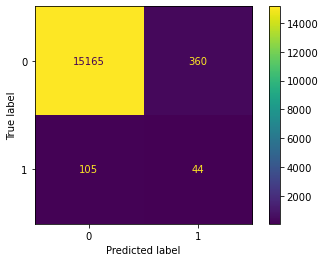

[23:14:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


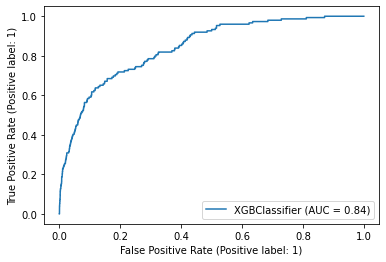

In [172]:
ypredxg = xg.predict(X_test)
print("Aaccuracy:" ,accuracy_score(y_test,ypredxg))
yproba_yes = xg.predict_proba(X_test)[:,1]
print("ROC AUC:" ,roc_auc_score(y_test,yproba_yes))
print("Kappa:" ,metrics.cohen_kappa_score(y_test, ypredxg))
print(classification_report(y_test,ypredxg))
metrics.plot_confusion_matrix(xg.fit(X_train,y_train), X_test, y_test)  
plt.show() 
metrics.plot_roc_curve(xg.fit(X_train,y_train), X_test, y_test)  
plt.show()   